In [1]:
import numpy as np
import matplotlib.pyplot as plt
from etv_plots import Plotter
from cbp_utils import im, g1, h, prec_timescale

In [2]:
system = '5095'
plot = Plotter(system)

In [3]:
chain : np.ndarray = np.load('mcmc_out/' + system + '_chains_2.npy')
prob = np.load('mcmc_out/' + system + '_probs_2.npy')
ndim = chain.shape[-1]
best_indx = prob.flatten()[np.nonzero(prob.flatten())].argmax()
print('Best chi-squared:', -2*prob.flatten()[best_indx])
x = chain.reshape(-1, ndim)[best_indx].copy()
x[14] *= 2

Best chi-squared: 77.71158657741978


Text(0.5, 0, 'Time (days)')

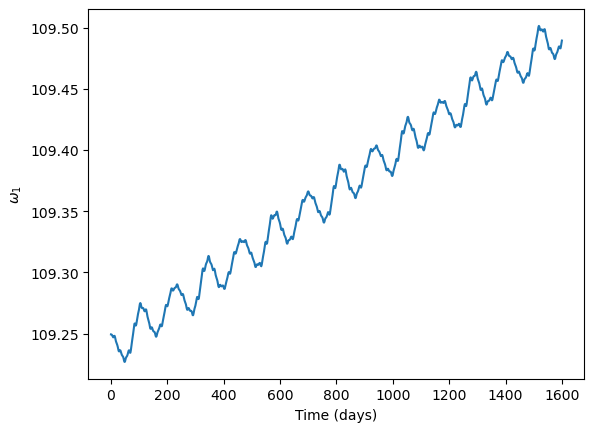

In [4]:
sim = plot.set_up_sim(x)
N = 1000
prec = np.zeros((N,6))
ts = np.linspace(0, 1600, N)
for i in range(N):
    sim.integrate(ts[i])
    prec[i,0] = ts[i]
    prec[i,1] = sim.particles[1].inc
    prec[i,2] = sim.particles[2].a
    prec[i,3] = sim.particles[2].e
    prec[i,4] = sim.particles[1].omega
prec[...,5] = prec[...,2]*(1 - prec[...,3]**2)/(1 + prec[...,3]*np.sin(prec[...,4])) * np.cos(prec[...,1])/(1.2*0.00465)
plt.plot(prec[...,0], np.degrees(prec[...,4]))
plt.ylabel('$\omega_1$'); plt.xlabel('Time (days)')

In [5]:
labels = ['$P_1$', '$T_{01}$', '$i_1$', '$e_1$', '$\omega_1$',
            '$P_2$', '$T_{p2}$', '$e_2\cos\omega_2$', '$e_2\sin\omega_2$', '$i_2$', '$\Omega_2$',
            '$M_A$', '$M_B$', '$M_p$', '$\gamma_{NOT}$', '$\gamma_{CAHA}$']

In [6]:
sim = plot.set_up_sim(x)
N = 1000
prec = np.zeros((N,7))
T_prec = prec_timescale(x[0], x[5], x[3], np.sqrt(x[7]**2 + x[8]**2), im(x[2], x[9], x[10]), g1(x[2], x[9], x[10], x[4]), x[11], x[12])
print(T_prec)
ts = np.linspace(0, T_prec, N)
for i in range(N):
    sim.integrate(ts[i])
    prec[i,0] = ts[i]
    prec[i,1] = sim.particles[1].inc
    prec[i,2] = sim.particles[2].inc
    prec[i,3] = sim.particles[2].Omega - sim.particles[1].Omega
    prec[i,4] = sim.particles[1].omega
    prec[i,5] = sim.particles[2].e
    prec[i,6] = sim.particles[2].omega

/home/max/Documents/Fabrycky/etv-fit/cbp_utils.py:38: RuntimeWarning: invalid value encountered in arcsin
  return np.where(k_sq_ < 1, ellipk(k_sq_), ellipkinc(np.arcsin(1/np.sqrt(k_sq_)), k_sq_))


31344.723728965022


Text(0, 0.5, 'Angle (degrees)')

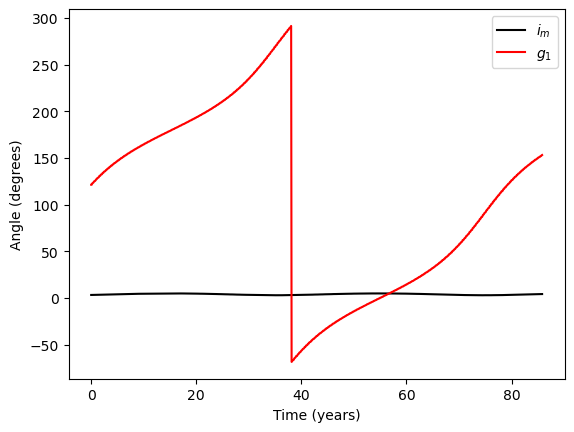

In [7]:
fig, ax1 = plt.subplots()
ax1.plot(prec[...,0]/365.25, np.degrees(im(*prec[...,1:4].T)), color='k', label='$i_m$')
ax1.plot(prec[...,0]/365.25, np.degrees(g1(*prec[...,1:5].T)), color='r', label='$g_1$')
ax1.legend()
ax1.set_xlabel('Time (years)'); ax1.set_ylabel('Angle (degrees)')

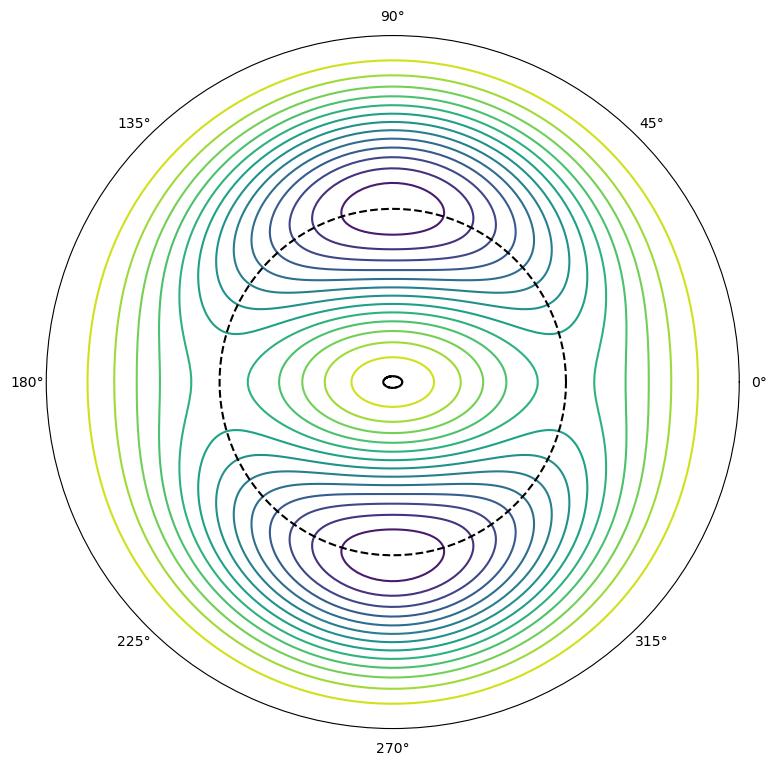

In [8]:
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(16,9))
azimuths = np.radians(np.linspace(0, 360, 180))
zeniths = np.linspace(0,180,180)
r, theta = np.meshgrid(zeniths, azimuths)
values = h(np.radians(r), theta, x[3])
ax.contour(theta, r, values, 15)
ax.plot(np.linspace(0, 2*np.pi, 100), 90.0*np.ones(100), color='k', linestyle='--')
ax.set_yticklabels([])
ax.set_ylim(0, 180)
ax.grid(False)
plt.plot(g1(*prec[...,1:5].T), np.degrees(im(*prec[...,1:4].T)), c='k')